Here, I am writing my own gradient descent algorithm on a linear reg. problem to learn how the algorithm works. 

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from __future__ import division

In [4]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 7, 13, 21])

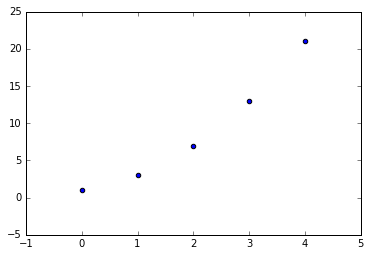

In [5]:
plt.scatter(x, y)

# Linear regression - gradient descent

$$w_0 = -2 \sum_{i=1}^{N} [y_i - (w_0 + w_1x_i) ]$$

$$w_1 = -2 \sum_{i=1}^{N} [y_i - (w_0 + w_1x_i)]\cdot x_i $$

where $(w_0 + w_1x_i) = \hat{y}_i$

In [8]:
def gradient_w0(w0, w1, xi, yi):
    return(yi - (w0 + w1*xi))

def gradient_w1(w0, w1, xi, yi):
    return(gradient_w0(w0, w1, xi, yi)*xi)

def linear_regression_gradient_descent(w0, w1, x, y, eta=0.05):
    counter = 0
    error = 1
    n = len(x)
    
    while error > 1.0E-6:
    
        tmp0 = w0 + (2/n)*eta*sum(gradient_w0(w0, w1, xi, yi) for xi, yi in zip(x, y))
        tmp1 = w1 + (2/n)*eta*sum(gradient_w1(w0, w1, xi, yi) for xi, yi in zip(x, y))
    
        err1 = np.fabs(tmp0 - w0)
        err2 = np.fabs(tmp1 - w1)
    
        error = np.sqrt(err1**2 + err2**2)
            
        # Update the values
        w0 = tmp0
        w1 = tmp1
        
        counter += 1
        
        # If the algo. does not converge
        if counter == 10000:
            raise RuntimeError("while loop exited without converging...")
            break
            
    print "No. iterations: %i" % counter
    print "w0: %g" % w0
    print "w1: %g" % w1 

In [9]:
# Find the coefficients
linear_regression_gradient_descent(w0=0, 
                                   w1=0,
                                   x=x,
                                   y=y,
                                   eta=0.05)

No. iterations: 373
w0: -0.99997
w1: 4.99999
